In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [14]:
df = pd.read_csv('data/county_demographics.csv')
df_pop = df[['STNAME', 'CTYNAME', 'COUNTY', 'POPESTIMATE2015']]
df_pop = df_pop[df_pop['COUNTY'] != 0]
del df_pop['COUNTY']
len(df_pop)

3142

In [110]:
not_state = ['Alaska', 'Hawaii', 'District of Columbia']
for note in not_state:
    df_pop = df_pop[df_pop['STNAME'] != note]
len(df_pop['STNAME'].unique())

48

In [1]:
for i, row in enumerate(df_pop['CTYNAME'].iteritems()):
    df_pop.loc[i, 'CTYNAME'] = row[1].replace(' County', '')


NameError: name 'df_pop' is not defined

In [2]:
del df_pop['COUNTY']


NameError: name 'df_pop' is not defined

In [41]:
df_loc = pd.read_csv('data/county_loc.csv')
print len(df_loc)
df_loc = df_loc.drop_duplicates(subset=['latitude','longitude'])
df_loc = df_loc.drop_duplicates(subset=['city','county', 'state'])

42741


In [42]:
in_state = df_loc['state'].unique()

state = ["AL","AZ","AR","CA","CO","CT","DE","FL","GA","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]
not_state = []
for i in in_state:
    if i not in state:
        not_state.append(i)
print not_state

['PR', 'VI', 'DC', 'HI', 'AS', 'GU', 'PW', 'FM', 'MP', 'MH', 'AK']


In [43]:
for note in not_state:
    df_loc = df_loc[df_loc['state'] != note]
len(df_loc['state'].unique())

48

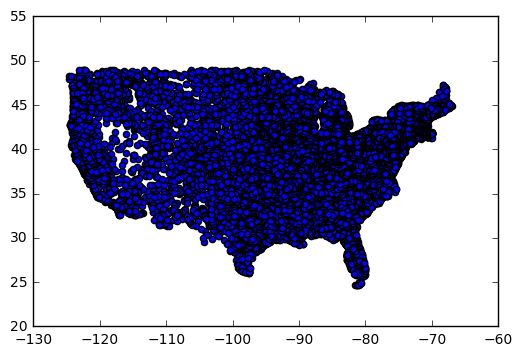

In [44]:
plt.scatter(df_loc['longitude'], df_loc['latitude'], marker='o')

In [45]:
df_loc = df_loc.groupby(['state','county']).agg({'latitude':'mean', 'longitude':'mean'})

In [46]:
df_loc = df_loc.reset_index()


In [50]:
len(df_loc['county'].unique())

1813

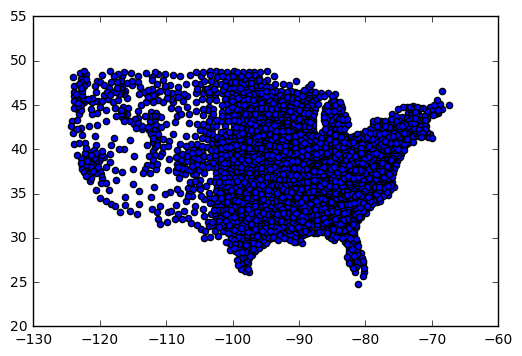

In [89]:
plt.scatter(df_loc['longitude'], df_loc['latitude'], marker='o')

In [51]:
df_loc.to_csv('data/location.csv', index=False)

In [ ]:
df_pop.to_csv('pop.csv')